## Sentiment of Newsoutlets 
This notebook is a steb-by-step tutorial showing the sentiments of popular newsoutlets in the Tweetplomacy-23 discourse. 
## Target Audience

This tutorial is aimed at a basic level. You should have basic knowledge of Pandas and Python programming.

## Duration

About one hour.

## Environment Setup

Run the cells below:

In [1]:
import pandas as pd

import numpy as np
import os

import matplotlib.pyplot as plt
%matplotlib inline 

pd.options.display.float_format = '{:.4f}'.format

from matplotlib.offsetbox import (AnnotationBbox, DrawingArea, OffsetImage,
                                  TextArea)

## Reda the Data

In [2]:
df = pd.read_pickle("joint_tweetplomacy_23_unique_tweets_with_freshest_retweet_metadata.pkl")

## Sentiments vs PLDs

In [3]:
df_epxloded = df.explode('plds')

In [4]:
sentiment_compound = df_epxloded.groupby('plds')['sentimentCompound'].mean().reset_index()
sentiment_compound

,plds,sentimentCompound
0,0.You,-0.8402
1,000.You,-0.2918
2,02xl.com,-0.1501
3,0xnft.app,0.4926
4,1.000.000.de,nan
...,...,...
30743,zumapress.com,0.3185
30744,zur-sache.at,0.0835
30745,zurl.co,0.1779
30746,zvei.org,0.8070


In [5]:
tweet_counts = df_epxloded.groupby('plds')['tweetId'].count().reset_index()
tweet_counts

,plds,tweetId
0,0.You,1
1,000.You,2
2,02xl.com,2
3,0xnft.app,1
4,1.000.000.de,1
...,...,...
30743,zumapress.com,2
30744,zur-sache.at,4
30745,zurl.co,3
30746,zvei.org,1


In [6]:
reactions = df_epxloded.groupby('plds')[['favorites', 'retweets', 'replies']].sum().reset_index()
reactions

,plds,favorites,retweets,replies
0,0.You,1,1,0
1,000.You,61,136,12
2,02xl.com,0,1,0
3,0xnft.app,0,0,0
4,1.000.000.de,100,50,11
...,...,...,...,...
30743,zumapress.com,56,19,12
30744,zur-sache.at,19,9,0
30745,zurl.co,47,72,10
30746,zvei.org,8,7,1


In [7]:
merged = pd.merge(sentiment_compound, tweet_counts, on='plds', how='inner')


In [8]:
merged = pd.merge(merged, reactions, on='plds', how='inner')


In [9]:
merged

,plds,sentimentCompound,tweetId,favorites,retweets,replies
0,0.You,-0.8402,1,1,1,0
1,000.You,-0.2918,2,61,136,12
2,02xl.com,-0.1501,2,0,1,0
3,0xnft.app,0.4926,1,0,0,0
4,1.000.000.de,nan,1,100,50,11
...,...,...,...,...,...,...
30743,zumapress.com,0.3185,2,56,19,12
30744,zur-sache.at,0.0835,4,19,9,0
30745,zurl.co,0.1779,3,47,72,10
30746,zvei.org,0.8070,1,8,7,1


In [10]:
from mbfc_utils import load_mbfc
mbfc = load_mbfc()
mbfc_domain2bias = {d:b for d,b in zip(mbfc["domain"].tolist(), mbfc["mbfc_bias"].tolist())}
mbfc_domain2polbias = {d:b for d,b in zip(mbfc["domain"].tolist(), mbfc["mbfc_polbias"].tolist())}

In [11]:
from tqdm.notebook import tqdm
tqdm.pandas()

def get_mbfc_label(row):
    try:
        return mbfc_domain2bias.get(row, None) 
    except:
        return []
def get_mbfc_pol_label(row):
    try:
        return mbfc_domain2polbias.get(row, None)
    except:
        return []
merged["mbfc_bias"] = merged['plds'].progress_apply(get_mbfc_label )
merged["mbfc_polbias"] = merged['plds'].progress_apply(get_mbfc_pol_label)
merged["mbfc_proscience"] = merged["mbfc_bias"] == "pro-science"

/home/dimitrovdr/anaconda3/lib/python3.7/site-packages/tqdm/std.py:648: FutureWarning: The Panel class is removed from pandas. Accessing it from the top-level namespace will also be removed in the next version
  from pandas import Panel


In [12]:
merged

,plds,sentimentCompound,tweetId,favorites,retweets,replies,mbfc_bias,mbfc_polbias,mbfc_proscience
0,0.You,-0.8402,1,1,1,0,None,nan,False
1,000.You,-0.2918,2,61,136,12,None,nan,False
2,02xl.com,-0.1501,2,0,1,0,None,nan,False
3,0xnft.app,0.4926,1,0,0,0,None,nan,False
4,1.000.000.de,nan,1,100,50,11,None,nan,False
...,...,...,...,...,...,...,...,...,...
30743,zumapress.com,0.3185,2,56,19,12,None,nan,False
30744,zur-sache.at,0.0835,4,19,9,0,None,nan,False
30745,zurl.co,0.1779,3,47,72,10,None,nan,False
30746,zvei.org,0.8070,1,8,7,1,None,nan,False


In [13]:
merged.groupby('mbfc_bias').count()

,plds,sentimentCompound,tweetId,favorites,retweets,replies,mbfc_polbias,mbfc_proscience
mbfc_bias,,,,,,,,
center,214,212,214,214,214,214,214,214
conspiracy-pseudoscience,124,123,124,124,124,124,5,124
fake-news,242,242,242,242,242,242,34,242
left,143,142,143,143,143,143,143,143
left-center,266,265,266,266,266,266,266,266
pro-science,60,60,60,60,60,60,0,60
right,88,88,88,88,88,88,88,88
right-center,165,161,165,165,165,165,165,165
satire,10,10,10,10,10,10,0,10


In [14]:
merged.groupby('mbfc_bias').mean().sentimentCompound

mbfc_bias
center                     -0.0953
conspiracy-pseudoscience   -0.1222
fake-news                  -0.1023
left                       -0.0717
left-center                -0.0445
pro-science                 0.0128
right                      -0.0382
right-center               -0.0521
satire                      0.0468
Name: sentimentCompound, dtype: float64

In [15]:
merged.groupby('mbfc_bias').sum()

,sentimentCompound,tweetId,favorites,retweets,replies,mbfc_polbias,mbfc_proscience
mbfc_bias,,,,,,,
center,-20.2134,5401,793825,328523,82725,0.0000,0.0000
conspiracy-pseudoscience,-15.0262,1586,114253,69043,10908,6.0000,0.0000
fake-news,-24.7555,4032,902295,384279,137839,57.0000,0.0000
left,-10.1865,2744,1142685,332762,120373,-286.0000,0.0000
left-center,-11.7988,13103,2163620,890336,190039,-266.0000,0.0000
pro-science,0.7681,1244,153424,70173,35132,0.0000,60.0000
right,-3.3599,1651,453102,208941,49852,176.0000,0.0000
right-center,-8.3894,4106,1321563,446170,153720,165.0000,0.0000
satire,0.4682,41,5259,2687,576,0.0000,0.0000


In [16]:
merged[merged['mbfc_bias'].notnull()]

,plds,sentimentCompound,tweetId,favorites,retweets,replies,mbfc_bias,mbfc_polbias,mbfc_proscience
29,100percentfedup.com,0.0869,41,6465,7421,754,fake-news,nan,False
41,11alive.com,0.1801,9,310,148,18,center,0.0000,False
47,12news.com,0.0228,5,416,204,26,center,0.0000,False
50,13wham.com,-0.3489,2,1,1,3,right-center,1.0000,False
70,19thnews.org,-0.1442,7,314,106,4,left,-2.0000,False
...,...,...,...,...,...,...,...,...,...
30689,zdf.de,0.2195,2,28,11,3,center,0.0000,False
30690,zdoggmd.com,-0.0684,10,597,102,162,pro-science,nan,True
30695,zeit.de,0.1538,7,277,78,9,left-center,-1.0000,False
30710,zerohedge.com,-0.6613,2,137,128,5,conspiracy-pseudoscience,2.0000,False


In [17]:
polbiased_plds = merged[merged['mbfc_polbias'].notnull()]

In [18]:
polbiased_plds

,plds,sentimentCompound,tweetId,favorites,retweets,replies,mbfc_bias,mbfc_polbias,mbfc_proscience
41,11alive.com,0.1801,9,310,148,18,center,0.0000,False
47,12news.com,0.0228,5,416,204,26,center,0.0000,False
50,13wham.com,-0.3489,2,1,1,3,right-center,1.0000,False
70,19thnews.org,-0.1442,7,314,106,4,left,-2.0000,False
139,247sports.com,-0.3343,4,22,8,1,center,0.0000,False
...,...,...,...,...,...,...,...,...,...
30617,yle.fi,-0.1777,14,320,86,8,center,0.0000,False
30689,zdf.de,0.2195,2,28,11,3,center,0.0000,False
30695,zeit.de,0.1538,7,277,78,9,left-center,-1.0000,False
30710,zerohedge.com,-0.6613,2,137,128,5,conspiracy-pseudoscience,2.0000,False


In [19]:
reactions_stats = polbiased_plds.groupby('mbfc_polbias').sum()[['favorites','retweets','replies']]

In [20]:
reactions_stats

,favorites,retweets,replies
mbfc_polbias,,,
-2.0000,1142792,332856,120373
-1.0000,2163622,890339,190039
0.0000,793825,328523,82725
1.0000,1329144,450083,154193
2.0000,997826,428866,137499


In [21]:
sentiment_stats = polbiased_plds.groupby('mbfc_polbias').mean()[['sentimentCompound']]

In [22]:
sentiment_stats

,sentimentCompound
mbfc_polbias,
-2.0000,-0.0691
-1.0000,-0.0454
0.0000,-0.0953
1.0000,-0.0605
2.0000,-0.0523


In [23]:
plds_tweets_counts = polbiased_plds.groupby('mbfc_polbias').count()[['tweetId']]

In [24]:
plds_tweets_counts.tweetId.sum()

915

In [25]:
polbiased_plds

,plds,sentimentCompound,tweetId,favorites,retweets,replies,mbfc_bias,mbfc_polbias,mbfc_proscience
41,11alive.com,0.1801,9,310,148,18,center,0.0000,False
47,12news.com,0.0228,5,416,204,26,center,0.0000,False
50,13wham.com,-0.3489,2,1,1,3,right-center,1.0000,False
70,19thnews.org,-0.1442,7,314,106,4,left,-2.0000,False
139,247sports.com,-0.3343,4,22,8,1,center,0.0000,False
...,...,...,...,...,...,...,...,...,...
30617,yle.fi,-0.1777,14,320,86,8,center,0.0000,False
30689,zdf.de,0.2195,2,28,11,3,center,0.0000,False
30695,zeit.de,0.1538,7,277,78,9,left-center,-1.0000,False
30710,zerohedge.com,-0.6613,2,137,128,5,conspiracy-pseudoscience,2.0000,False


In [26]:
plds_tweets_sum = polbiased_plds['tweetId'].sum()

In [27]:
plds_tweets_sum

28728

In [28]:
polbiased_plds.groupby('mbfc_polbias').sum()[['tweetId']]


,tweetId
mbfc_polbias,
-2.0000,2746
-1.0000,13105
0.0000,5401
1.0000,4219
2.0000,3257


In [29]:
bias_to_pld_stats =  pd.merge(reactions_stats, sentiment_stats, on='mbfc_polbias', how='inner')
bias_to_pld_stats =  pd.merge(plds_tweets_counts, bias_to_pld_stats, on='mbfc_polbias', how='inner')

In [30]:
bias_to_pld_stats.reset_index()
bias_to_pld_stats.rename(columns={'tweetId': 'plds'}, inplace=True)
bias_to_pld_stats

,plds,favorites,retweets,replies,sentimentCompound
mbfc_polbias,,,,,
-2.0000,144,1142792,332856,120373,-0.0691
-1.0000,267,2163622,890339,190039,-0.0454
0.0000,214,793825,328523,82725,-0.0953
1.0000,173,1329144,450083,154193,-0.0605
2.0000,117,997826,428866,137499,-0.0523


In [31]:
bias_to_pld_stats['mbfc_bias']=['left', 'left-center', 'center', 'right-center', 'right']

In [32]:
bias_to_pld_stats

,plds,favorites,retweets,replies,sentimentCompound,mbfc_bias
mbfc_polbias,,,,,,
-2.0000,144,1142792,332856,120373,-0.0691,left
-1.0000,267,2163622,890339,190039,-0.0454,left-center
0.0000,214,793825,328523,82725,-0.0953,center
1.0000,173,1329144,450083,154193,-0.0605,right-center
2.0000,117,997826,428866,137499,-0.0523,right


In [33]:
options= ['left', 'left-center', 'center', 'right-center', 'right']
tweets = merged.groupby('mbfc_bias').sum().reset_index()
tweets = tweets[tweets['mbfc_bias'].isin(options)][['mbfc_bias','tweetId']]
tweets.rename(columns={'tweetId': 'tweets'}, inplace=True)
tweets

,mbfc_bias,tweets
0,center,5401
3,left,2744
4,left-center,13103
6,right,1651
7,right-center,4106


In [34]:
tweets.tweets.sum()

27005

In [35]:
bias_to_pld_stats= bias_to_pld_stats.reset_index()

In [36]:
bias_to_pld_stats

,mbfc_polbias,plds,favorites,retweets,replies,sentimentCompound,mbfc_bias
0,-2.0000,144,1142792,332856,120373,-0.0691,left
1,-1.0000,267,2163622,890339,190039,-0.0454,left-center
2,0.0000,214,793825,328523,82725,-0.0953,center
3,1.0000,173,1329144,450083,154193,-0.0605,right-center
4,2.0000,117,997826,428866,137499,-0.0523,right


In [37]:
bias_to_pld_stats =  pd.merge(tweets, bias_to_pld_stats, on='mbfc_bias', how='inner')

In [38]:
bias_to_pld_stats

,mbfc_bias,tweets,mbfc_polbias,plds,favorites,retweets,replies,sentimentCompound
0,center,5401,0.0000,214,793825,328523,82725,-0.0953
1,left,2744,-2.0000,144,1142792,332856,120373,-0.0691
2,left-center,13103,-1.0000,267,2163622,890339,190039,-0.0454
3,right,1651,2.0000,117,997826,428866,137499,-0.0523
4,right-center,4106,1.0000,173,1329144,450083,154193,-0.0605


In [39]:
bias_to_pld_stats.rename(columns={'sentimentCompound': 'sentiment'}, inplace=True)
bias_to_pld_stats.sort_values('mbfc_polbias').loc[ : , bias_to_pld_stats.columns != 'mbfc_polbias']

,mbfc_bias,tweets,plds,favorites,retweets,replies,sentiment
1,left,2744,144,1142792,332856,120373,-0.0691
2,left-center,13103,267,2163622,890339,190039,-0.0454
0,center,5401,214,793825,328523,82725,-0.0953
4,right-center,4106,173,1329144,450083,154193,-0.0605
3,right,1651,117,997826,428866,137499,-0.0523


In [40]:
allsidesplotdf= merged[merged['mbfc_polbias'].notnull()].groupby('plds').mean().reset_index()

In [41]:
allsidesplotdf

,plds,sentimentCompound,tweetId,favorites,retweets,replies,mbfc_polbias,mbfc_proscience
0,11alive.com,0.1801,9,310,148,18,0.0000,False
1,12news.com,0.0228,5,416,204,26,0.0000,False
2,13wham.com,-0.3489,2,1,1,3,1.0000,False
3,19thnews.org,-0.1442,7,314,106,4,-2.0000,False
4,247sports.com,-0.3343,4,22,8,1,0.0000,False
...,...,...,...,...,...,...,...,...
910,yle.fi,-0.1777,14,320,86,8,0.0000,False
911,zdf.de,0.2195,2,28,11,3,0.0000,False
912,zeit.de,0.1538,7,277,78,9,-1.0000,False
913,zerohedge.com,-0.6613,2,137,128,5,2.0000,False


In [42]:
newsoutlets = pd.read_excel('qualitatively-selected-newsoutlets.xlsx')
newsoutlets['paths'] = newsoutlets['n'].astype(str) +' '+newsoutlets['newsoutlet']+'.jpg'
print(newsoutlets)

     n                          pld                      newsoutlet  \
0    1              theatlantic.com                    The Atlantic   
1    2                 alternet.org                        AlterNet   
2    3                    msnbc.com                           MSNBC   
3    4              theguardian.com                    The Guardian   
4    5                 huffpost.com                 Huffington Post   
5    6                thenation.com                      The Nation   
6    7                 mirror.co.uk                    Daily Mirror   
7    8                newyorker.com                  The New Yorker   
8    9                liberation.fr                      Libération   
9   10                       taz.de                    tageszeitung   
10  11                  nytimes.com                  New York Times   
11  12               abcnews.go.com                        ABC News   
12  13                    axios.com                           Axios   
13  14

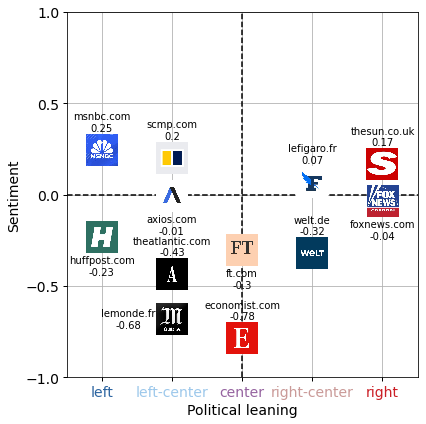

In [44]:
# Plot setup
fig, ax = plt.subplots(figsize=(6,6))

# Load and prepare data
newsoutlets = pd.read_excel('qualitatively-selected-newsoutlets.xlsx')
newsoutlets['paths'] = './newsoutlets-logos/twitter-logos/'+ newsoutlets['newsoutlet'] + '_400x400.jpg'

# Filter sampled_plds to match selected outlets
sampled_plds = allsidesplotdf[allsidesplotdf['plds'].isin(newsoutlets['pld'])]

sampled_plds_merged_newsoutlets = sampled_plds.merge(newsoutlets[['pld', 'paths']], left_on='plds', right_on='pld', how='left')
#sampled_plds_merged_newsoutlets = sampled_plds_merged_newsoutlets.groupby('mbfc_polbias', group_keys=False).apply(lambda x: x.sample(2))

options= ['scmp.com','msnbc.com', 'huffpost.com', 
          'lefigaro.fr',   
          'lemonde.fr', 'economist.com', 'foxnews.com', 'ft.com', 'theatlantic.com' ,'axios.com', 'welt.de',  'thesun.co.uk']# 'wsj.com',   #  'newsweek.com', 'vaticannews.va','latimes.com', 'cbsnews.com' 'spiegel.de', 'nytimes.com',    'eldiario.es', 'ft.com', 'welt.de', 'bild.de' 

sampled_plds = sampled_plds_merged_newsoutlets[sampled_plds_merged_newsoutlets['plds'].isin(options)].sort_values('sentimentCompound', ascending = False)
# Color mapping
unique_biases = bias_to_pld_stats.mbfc_polbias.tolist()
colors = ['#9664A0', '#2C64A0', '#9DC8EB', '#CB1F26', '#CA9A98']
color_map = dict(zip(unique_biases, colors))

#print(sampled_plds.plds)

# Plot images
for _, row in sampled_plds.iterrows():
    x, y = row['mbfc_polbias'], row['sentimentCompound']
    img_path = row['paths']
    
    if row['plds'] in ['newsweek.com', 'foxnews.com', 'ft.com', 'cbsnews.com','huffpost.com' ,'axios.com']:#'cnn.com'
        
    
        if pd.notna(img_path) and os.path.exists(img_path):
            img = plt.imread(img_path)
            imagebox = OffsetImage(img, zoom=0.08)
            ab = AnnotationBbox(imagebox, (x, y), frameon=False)
            ax.add_artist(ab)
            #ta = TextArea(f"{row['plds']}\n{round(row['sentimentCompound'], 2)}")
            ta = TextArea(f"{row['plds']}\n{round(row['sentimentCompound'], 2)}", textprops=dict(fontsize=10, horizontalalignment='center'))


            ab = AnnotationBbox(ta, (x, y-0.16), frameon=False)
            ax.add_artist(ab)


        else:
            print(img_path)
            ax.plot(x, y, 'o', color='gray', markersize=10)  # fallback
    elif  row['plds'] in [ 'spiegel.de']:    
        if pd.notna(img_path) and os.path.exists(img_path):
            img = plt.imread(img_path)
            imagebox = OffsetImage(img, zoom=0.08)
            ab = AnnotationBbox(imagebox, (x, y), frameon=False)
            ax.add_artist(ab)
            ta = TextArea(f"{row['plds']}\n{round(row['sentimentCompound'], 2)}")
            ta = TextArea(f"{row['plds']}\n{round(row['sentimentCompound'], 2)}", textprops=dict(fontsize=10, horizontalalignment='center'))

            ab = AnnotationBbox(ta, (x+0.6, y-0.05), frameon=False)
            ax.add_artist(ab)


        else:
            print(img_path)
            ax.plot(x, y, 'o', color='gray', markersize=10)  # fallback
    elif  row['plds'] in ['lemonde.fr']:    
        if pd.notna(img_path) and os.path.exists(img_path):
            img = plt.imread(img_path)
            imagebox = OffsetImage(img, zoom=0.08)
            ab = AnnotationBbox(imagebox, (x, y), frameon=False)
            ax.add_artist(ab)
            ta = TextArea(f"{row['plds']}\n{round(row['sentimentCompound'], 2)}")
            ta = TextArea(f"{row['plds']}\n{round(row['sentimentCompound'], 2)}", textprops=dict(fontsize=10, horizontalalignment='center'))

            ab = AnnotationBbox(ta, (x-0.62, y), frameon=False)
            ax.add_artist(ab)


        else:
            print(img_path)
            ax.plot(x, y, 'o', color='gray', markersize=10)  # fallback
    else:
        if pd.notna(img_path) and os.path.exists(img_path):
            img = plt.imread(img_path)
            imagebox = OffsetImage(img, zoom=0.08)
            ab = AnnotationBbox(imagebox, (x, y), frameon=False)
            ax.add_artist(ab)
            ta = TextArea(f"{row['plds']}\n{round(row['sentimentCompound'], 2)}")
            ta = TextArea(f"{row['plds']}\n{round(row['sentimentCompound'], 2)}", textprops=dict(fontsize=10, horizontalalignment='center'))
            ab = AnnotationBbox(ta, (x, y+0.15), frameon=False)
            ax.add_artist(ab)


        else:
            print(img_path)
            ax.plot(x, y, 'o', color='gray', markersize=10)  # fallback
                          
        
 
        
# Axis setup
ax.set_xlabel('Political leaning', fontsize=14)
ax.set_ylabel('Sentiment', fontsize=14)
ax.set_ylim([-1, 1])
ax.set_yticks(np.linspace(-1, 1, 5))
ax.set_xticks(unique_biases)
ax.set_xlim([-2.5, 2.5])
ax.set_xticklabels(bias_to_pld_stats.mbfc_bias, fontsize=18, ha='center')

# Color x-axis tick labels
for label, color in zip(ax.get_xticklabels(), colors):
    label.set_color(color)

# Final plot formatting
plt.xticks(fontsize=14, ha='center')
plt.yticks(fontsize=14, ha='right')
plt.axhline(0, color='black', linestyle='dashed')
plt.axvline(0, color='black', linestyle='dashed')
plt.grid(True)
                          

ax.tick_params(axis='x', which='minor', length=4, width=1, color='gray', labelsize=18)
ax.tick_params(axis='x', which='major', length=4, width=1, labelsize=14)

ax.tick_params(axis='y', which='minor', length=4, width=1, color='gray', labelsize=18)
ax.tick_params(axis='y', which='major', length=4, width=1, labelsize=14)
plt.tight_layout()

                          
plt.savefig('./plots/sentimentsvsplds.pdf', bbox_inches = 'tight')
plt.show()